In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


<a id = "1"></a><br>
# Load and check data

In [2]:
data=pd.read_csv('C:/Users/admin/Desktop/neha project/Assignment/HeartDisease.csv')

In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
data = data.replace('?',0)

In [4]:
data.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


<AxesSubplot:>

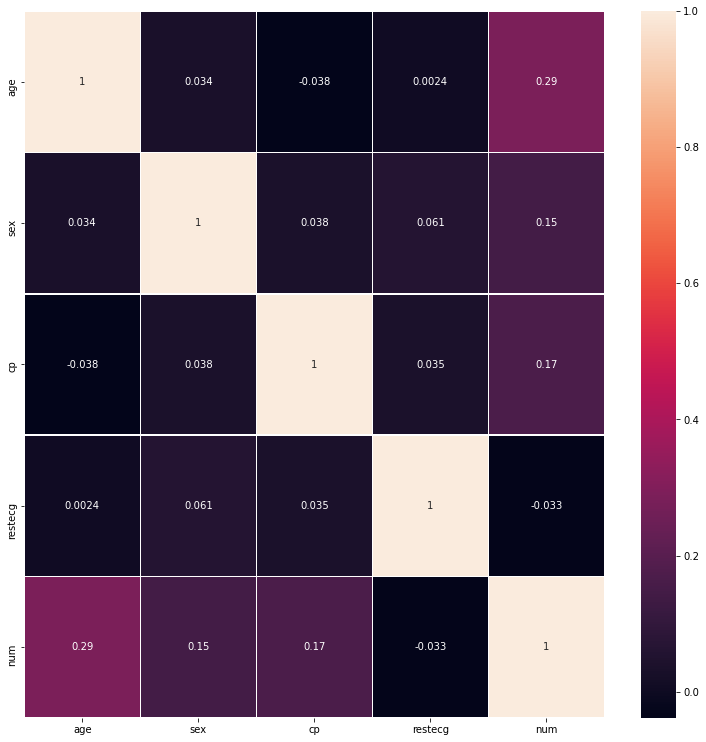

In [5]:

fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

<a id = "4"></b><br>
## Categorical Variable 

In [6]:
import matplotlib.pyplot as plt

In [7]:
def bar_plot(variable):
    var =data[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

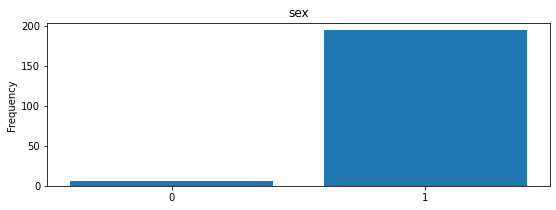

sex: 
 1    194
0      6
Name: sex, dtype: int64


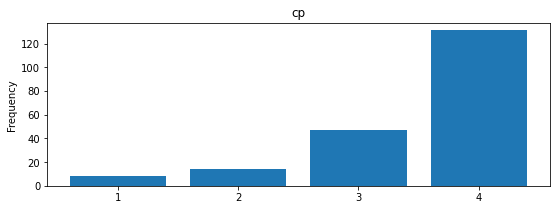

cp: 
 4    131
3     47
2     14
1      8
Name: cp, dtype: int64


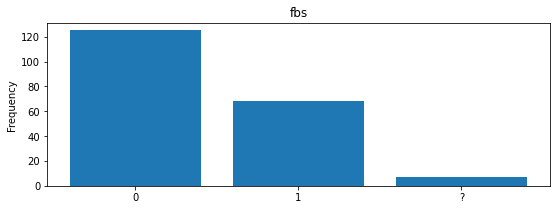

fbs: 
 0    125
1     68
?      7
Name: fbs, dtype: int64


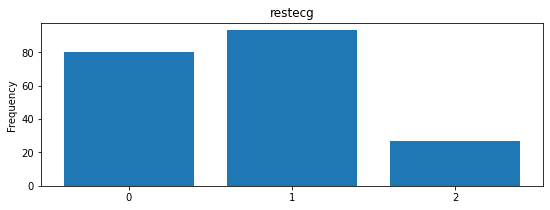

restecg: 
 1    93
0    80
2    27
Name: restecg, dtype: int64


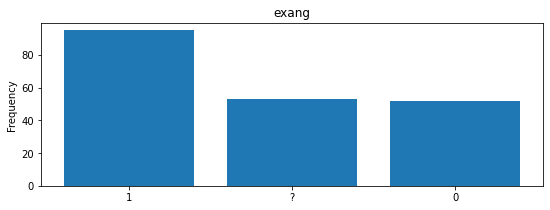

exang: 
 1    95
?    53
0    52
Name: exang, dtype: int64


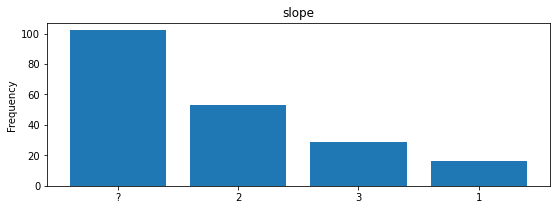

slope: 
 ?    102
2     53
3     29
1     16
Name: slope, dtype: int64


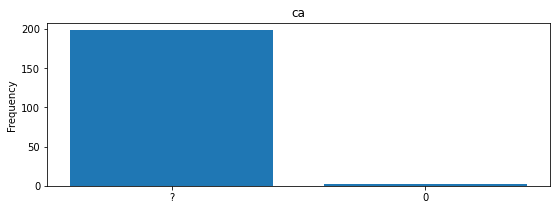

ca: 
 ?    198
0      2
Name: ca, dtype: int64


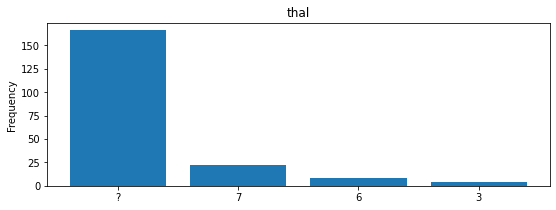

thal: 
 ?    166
7     22
6      8
3      4
Name: thal, dtype: int64


KeyError: 'target'

In [8]:
category1 = ["sex", "cp", "fbs", "restecg", "exang", "slope","ca","thal","target"]
for c in category1:
    bar_plot(c)

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6),color=['#0000ff','#000000' ])
plt.title('Heart Disease Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()


<a id = "5"></a><br>
## Numerical Variable

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], bins=40)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distrubition with hist".format(variable))
    plt.show()

In [ ]:
numericVar = ["age","trestbps","chol","thalach","oldpeak"]
for n in numericVar:
    plot_hist(n)

In [ ]:
# cp vs target
data[["cp","target"]].groupby(["cp"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# sex vs target
data[["sex","target"]].groupby(["sex"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# restecg vs target
data[["restecg","target"]].groupby(["restecg"], as_index = False).mean().sort_values(by="target",ascending = False)

In [ ]:
# exang vs target
data[["exang","target"]].groupby(["exang"], as_index = False).mean().sort_values(by="target",ascending = False)

<a id = "7"></a><br>
# Outlier Detection

In [ ]:
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,["age","trestbps","chol","thalach","oldpeak"])]

In [ ]:
data.head(10)

<a id = "8"></a><br>
 # Missing Value
* Find Missing Value


In [ ]:
data_len = len(data)
data = pd.concat([data],axis = 0).reset_index(drop = True)

In [ ]:
data.head()

<a id = "9"></a><br>
## Find Missing Value

In [ ]:
data.columns[data.isnull().any()]

In [ ]:
data.isnull().sum()

In [ ]:
accuracies = {}

<a id = "11"></a><br>
 ## Gini:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score


In [ ]:
X = data.iloc[:, 0:13]
Y = data.iloc[:, 13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                               max_depth=3, min_samples_leaf=5)

In [ ]:
clf_gini.fit(X_train, y_train)



In [ ]:
print(clf_gini.predict([[40,1,1,141.5,271,1,1,151,0,0.8,2,3,2]]))

In [ ]:
y_pred = clf_gini.predict(X_test)
print(y_pred)


In [ ]:
print ("Accuracy score gini ", accuracy_score(y_test,y_pred)*100)

In [ ]:
acc=accuracy_score(y_test,y_pred)*100
accuracies['Gini']=acc

<a id = "12"></a><br>
 ## Entropy:

In [ ]:
X = data.iloc[:, 0:13]
Y = data.iloc[:, 13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

In [ ]:
print(clf_entropy.predict([[40,1,1,141.5,271,1,1,151,0,0.8,2,3,2]]))

In [ ]:
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

In [ ]:
print ("Accuracy score entropy ", accuracy_score(y_test,y_pred_en)*100)


In [ ]:
acc=accuracy_score(y_test,y_pred_en)*100
accuracies['Entropy']=acc

<a id = "13"></a><br>
 ## Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
randomf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
randomf.fit(X_train, y_train)

In [ ]:
print(randomf.predict([[40,1,1,141.5,271,1,1,151,0,0.8,2,3,2]]))

In [ ]:
y_pred_randomf = randomf.predict(X_test)
print(y_pred_randomf)

In [ ]:
print ("Accuracy score random forest: ", accuracy_score(y_test,y_pred_randomf)*100)

In [ ]:
acc=accuracy_score(y_test,y_pred_randomf)*100
accuracies['Random Forest']=acc

<a id = "14"></a><br>
 ## KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = data.iloc[:, 0:13]
Y = data.iloc[:, 13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
print(knn.predict([[40,1,1,141.5,271,1,1,151,0,0.8,2,3,2]]))

In [ ]:
y_predknn = knn.predict(X_test)
print(y_predknn)

In [ ]:
print ("Accuracy score knn ", accuracy_score(y_test,y_predknn)*100)

In [ ]:
acc=accuracy_score(y_test,y_predknn)*100
accuracies['KNN']=acc

<a id = "16"></a><br>
## Comparison of algorithms

In [ ]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()